In [4]:
import polars as pl
import pandas as pd


In [81]:
import os
def get_market_capital(code):
    file_name = f"out/{code}.csv"
    df = pd.read_csv(file_name, index_col=0, parse_dates=True)
    # sort by date desc
    df = df.sort_index(ascending=False)
    df.rename(columns={"market_capital": code}, inplace=True)
    market_capital = df[code]
    # market_capital.rename(columns={'market_capital':code}, inplace=True)
    return market_capital

def get_increase_rate(code, interval=10):
    market_capital = get_market_capital(code)
    # get the diff interval value
    increase_value = market_capital.diff(-(interval - 1))
    # get the shift interval value
    shift_value = market_capital.shift(-(interval - 1))
    # calculate the increase rate
    increase_rate = increase_value / shift_value
    return increase_rate

def get_all_code():
    file_names = os.listdir("out")
    codes = [file_name.split(".")[0] for file_name in file_names]
    return codes

def get_all_increase_rate(interval=10):
    codes = get_all_code()
    increase_rates = {}
    for code in codes:
        increase_rate = get_increase_rate(code, interval)
        increase_rates[code] = increase_rate
    return increase_rates
    

In [161]:
def calculate_increase_rate_rankdf(df_rate):
    serial_list = [df_rate[c] for c in df_rate]
    ranks_df = pd.concat(serial_list, axis=1)
    ranks_df.sort_index(ascending=False, inplace=True)
    r_t = ranks_df.T
    # get columns name by time str
    columns = [str(c)[:10] for c in r_t.columns]
    ranks = []
    for col in columns:
        ranks.append(r_t[col].rank(ascending=True, method='first', pct=True))

    new_rank = pd.concat(ranks, axis=1)
    trank = new_rank.T
    
    return trank
    

In [169]:
def get_all_market_capital():
    codes = get_all_code()
    market_capitals = []
    for code in codes:
        market_capital = get_market_capital(code)
        market_capitals.append(market_capital)
    
    market_capitals_df = pd.concat(market_capitals, axis=1)
    market_capitals_df.sort_index(ascending=False, inplace=True)
    return market_capitals_df

In [170]:
all_markets = get_all_market_capital()

In [171]:
all_markets.head()

,SH603105,SZ002435,SZ002353,SZ000544,SH603663,SZ000550,SZ001896,SH603677,SZ002347,SH600418,...,SZ002410,SH600429,SH603108,SZ002438,SH600367,SZ003040,SZ300297,SH600373,SZ300283,SH600415
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-02,6.645000e+09,6.229354e+09,3.215390e+10,6.676589e+09,4.189463e+09,1.271514e+10,8.605407e+09,2.276895e+09,2.594170e+09,3.088190e+10,...,6.550949e+10,8.511971e+09,6.496674e+09,6.120902e+09,5.049534e+09,8.992151e+09,2.349803e+09,1.310347e+10,2.360288e+09,2.463247e+10
2022-12-01,6.570000e+09,6.105756e+09,3.201012e+10,6.618108e+09,4.156213e+09,1.293958e+10,8.727469e+09,2.257681e+09,2.609311e+09,3.184286e+10,...,6.562862e+10,7.738156e+09,6.328606e+09,6.085374e+09,5.040737e+09,8.844588e+09,2.249812e+09,1.310347e+10,2.329692e+09,2.496164e+10
2022-11-30,6.520000e+09,6.155195e+09,3.209228e+10,6.666842e+09,4.026237e+09,1.329350e+10,8.681696e+09,2.261524e+09,2.654734e+09,3.221414e+10,...,6.620044e+10,7.040204e+09,6.438719e+09,5.958490e+09,5.014346e+09,8.641688e+09,2.299808e+09,1.304926e+10,2.320950e+09,2.430331e+10
2022-11-29,6.590000e+09,6.204635e+09,3.170204e+10,6.686336e+09,4.056464e+09,1.243028e+10,8.742727e+09,2.236545e+09,2.669875e+09,2.933125e+10,...,6.574775e+10,7.040204e+09,6.386560e+09,5.912811e+09,5.023143e+09,8.812308e+09,2.262311e+09,1.302216e+10,2.338433e+09,2.474219e+10
2022-11-28,6.550000e+09,5.945078e+09,3.112694e+10,6.686336e+09,4.029259e+09,1.221448e+10,8.696954e+09,2.213488e+09,2.679969e+09,2.889445e+10,...,6.272185e+10,6.918822e+09,6.096789e+09,5.912811e+09,4.946901e+09,8.632465e+09,2.224814e+09,1.281890e+10,2.294724e+09,2.391928e+10


In [162]:
increase_rate_10 = get_all_increase_rate(10)


In [172]:
increase_rate_20 = get_all_increase_rate(20)

In [173]:
rps20 = calculate_increase_rate_rankdf(increase_rate_20)

In [174]:
rps20.head()

,SH603105,SZ002435,SZ002353,SZ000544,SH603663,SZ000550,SZ001896,SH603677,SZ002347,SH600418,...,SZ002410,SH600429,SH603108,SZ002438,SH600367,SZ003040,SZ300297,SH600373,SZ300283,SH600415
2022-12-02,0.046313,0.818022,0.130883,0.720362,0.184244,0.197835,0.534105,0.503146,0.615907,0.165366,...,0.907878,0.968789,0.369746,0.440473,0.055374,0.255474,0.460106,0.819028,0.300277,0.429398
2022-12-01,0.027932,0.760946,0.160292,0.709361,0.173377,0.222698,0.750377,0.483644,0.590086,0.143432,...,0.906643,0.909663,0.186462,0.348264,0.069451,0.221439,0.591847,0.836940,0.262708,0.538249
2022-11-30,0.089079,0.766734,0.182436,0.843986,0.173880,0.399597,0.784852,0.455712,0.703070,0.402365,...,0.927529,0.661047,0.222194,0.323100,0.156517,0.157776,0.730498,0.814041,0.266985,0.419728
2022-11-29,0.124780,0.723019,0.092830,0.850566,0.231950,0.158491,0.795220,0.393208,0.682516,0.086038,...,0.887296,0.633208,0.194969,0.275723,0.156226,0.181635,0.580629,0.807799,0.295346,0.531069
2022-11-28,0.078782,0.456834,0.204128,0.871634,0.252957,0.244148,0.818525,0.387113,0.639567,0.381072,...,0.794614,0.628744,0.098918,0.386106,0.206393,0.140448,0.606091,0.802668,0.238611,0.443997


In [164]:
rps10 = calculate_increase_rate_rankdf(increase_rate_10)

In [165]:
rps10.head()


,SH603105,SZ002435,SZ002353,SZ000544,SH603663,SZ000550,SZ001896,SH603677,SZ002347,SH600418,...,SZ002410,SH600429,SH603108,SZ002438,SH600367,SZ003040,SZ300297,SH600373,SZ300283,SH600415
2022-12-02,0.348603,0.180216,0.315631,0.597030,0.363705,0.391895,0.538384,0.515228,0.251447,0.192801,...,0.779260,0.984395,0.143217,0.222754,0.265291,0.256985,0.581928,0.835641,0.186761,0.601057
2022-12-01,0.394565,0.238551,0.152491,0.535732,0.351032,0.707851,0.774283,0.499748,0.701560,0.898339,...,0.717665,0.948666,0.103674,0.185959,0.361852,0.232260,0.173377,0.752642,0.209109,0.653749
2022-11-30,0.507297,0.614494,0.221943,0.772270,0.170861,0.823603,0.790388,0.626321,0.752894,0.939607,...,0.864117,0.502013,0.274031,0.234273,0.252642,0.048062,0.309260,0.875944,0.362859,0.477856
2022-11-29,0.425660,0.761761,0.074969,0.853082,0.127296,0.224403,0.798239,0.517484,0.714969,0.228428,...,0.852830,0.575346,0.275220,0.138365,0.148931,0.205535,0.130566,0.897358,0.402013,0.649811
2022-11-28,0.355651,0.587969,0.090108,0.902341,0.217971,0.282658,0.888246,0.687390,0.930028,0.322678,...,0.647370,0.680846,0.079285,0.265291,0.091618,0.203121,0.311100,0.909388,0.430154,0.510949


In [133]:
serial_list = [increase_rate_10[c] for c in increase_rate_10]
ranks_df = pd.concat(serial_list, axis=1)
ranks_df.sort_index(ascending=False, inplace=True)
# ranks_df.head()

,SH603105,SZ002435,SZ002353,SZ000544,SH603663,SZ000550,SZ001896,SH603677,SZ002347,SH600418,...,SZ002410,SH600429,SH603108,SZ002438,SH600367,SZ003040,SZ300297,SH600373,SZ300283,SH600415
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-12-02,-0.011896,-0.040000,-0.016646,0.017831,-0.010000,-0.006743,0.010753,0.007653,-0.026515,-0.038095,...,0.044246,0.211663,-0.047579,-0.032103,-0.024363,-0.025487,0.016216,0.057987,-0.039146,0.018141
2022-12-01,-0.009797,-0.031373,-0.046789,0.007418,-0.014337,0.026712,0.036232,0.003416,0.025794,0.072059,...,0.027799,0.111111,-0.060241,-0.040800,-0.013203,-0.032291,-0.042553,0.033120,-0.036166,0.020179
2022-11-30,-0.009871,0.002012,-0.050729,0.025487,-0.059986,0.035642,0.028933,0.003410,0.021359,0.092593,...,0.047108,-0.010661,-0.041415,-0.048622,-0.045226,-0.099038,-0.036649,0.051310,-0.029250,-0.013363
2022-11-29,-0.017151,0.024490,-0.077406,0.045732,-0.062849,-0.044459,0.030576,-0.005978,0.017308,-0.044128,...,0.045661,0.000000,-0.037555,-0.060484,-0.057756,-0.047358,-0.062176,0.063053,-0.020147,0.008949
2022-11-28,-0.047273,-0.018367,-0.091971,0.044140,-0.066527,-0.057295,0.036364,-0.006040,0.062000,-0.051613,...,-0.011268,-0.006536,-0.095443,-0.059726,-0.091546,-0.069120,-0.053191,0.047619,-0.038462,-0.028953


In [149]:
r_t = ranks_df.T
# get columns name by time str
columns = [str(c)[:10] for c in r_t.columns]
ranks = []
for col in columns:
    ranks.append(r_t[col].rank(ascending=True, method='first', pct=True))


In [158]:
rps10 = calculate_increase_rate_rankdf(increase_rate_10)

In [159]:
len(rps10)

5321

In [160]:
rps10.head()

,SH603105,SZ002435,SZ002353,SZ000544,SH603663,SZ000550,SZ001896,SH603677,SZ002347,SH600418,...,SZ002410,SH600429,SH603108,SZ002438,SH600367,SZ003040,SZ300297,SH600373,SZ300283,SH600415
2022-12-02,0.348603,0.180216,0.315631,0.597030,0.363705,0.391895,0.538384,0.515228,0.251447,0.192801,...,0.779260,0.984395,0.143217,0.222754,0.265291,0.256985,0.581928,0.835641,0.186761,0.601057
2022-12-01,0.394565,0.238551,0.152491,0.535732,0.351032,0.707851,0.774283,0.499748,0.701560,0.898339,...,0.717665,0.948666,0.103674,0.185959,0.361852,0.232260,0.173377,0.752642,0.209109,0.653749
2022-11-30,0.507297,0.614494,0.221943,0.772270,0.170861,0.823603,0.790388,0.626321,0.752894,0.939607,...,0.864117,0.502013,0.274031,0.234273,0.252642,0.048062,0.309260,0.875944,0.362859,0.477856
2022-11-29,0.425660,0.761761,0.074969,0.853082,0.127296,0.224403,0.798239,0.517484,0.714969,0.228428,...,0.852830,0.575346,0.275220,0.138365,0.148931,0.205535,0.130566,0.897358,0.402013,0.649811
2022-11-28,0.355651,0.587969,0.090108,0.902341,0.217971,0.282658,0.888246,0.687390,0.930028,0.322678,...,0.647370,0.680846,0.079285,0.265291,0.091618,0.203121,0.311100,0.909388,0.430154,0.510949


In [175]:
rps10.plot()

<AxesSubplot: >

ValueError: Image size of 547x84332 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [150]:
new_rank = pd.concat(ranks, axis=1)
trank = new_rank.T
# # new_rank.dropna(inplace=True, axis=1)
# for col in columns:
#     new_rank[col] = new_rank[col] / len(new_rank[col])

<AxesSubplot: >

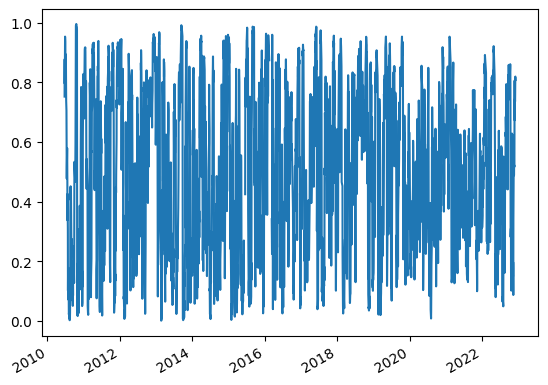

In [151]:
trank["SH600000"].plot()

In [152]:
market = get_market_capital("SH600000")
dfranks = trank["SH600000"]
dfranks = dfranks.to_frame()
dfranks["market"] = market

In [153]:
dfranks = dfranks.to_frame()
dfranks["market"] = market


<AxesSubplot: >

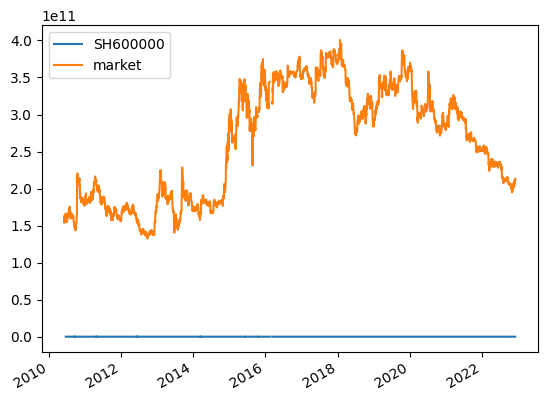

In [154]:
dfranks.plot()

In [144]:
import seaborn as sns

<AxesSubplot: xlabel='market', ylabel='Density'>

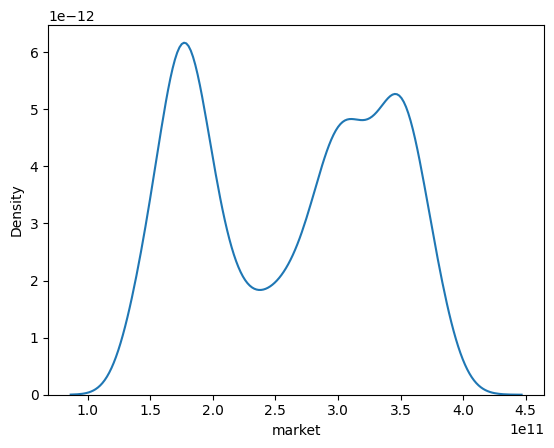

In [155]:
sns.kdeplot(dfranks["market"])

In [140]:
# seaborn plot the market capital and rps10
market.head()


timestamp
2022-12-02 00:00:00    212216215532.880005
2022-12-01 00:00:00    211922693796.320007
2022-11-30 00:00:00    211922693796.320007
2022-11-29 00:00:00    213390302479.119995
2022-11-28 00:00:00    207519867747.920013
Name: SH600000, dtype: object

In [129]:
from pandasgui import show

In [156]:
show(dfranks)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [118]:
market.head()

timestamp
2022-12-02    2.122162e+11
2022-12-01    2.119227e+11
2022-11-30    2.119227e+11
2022-11-29    2.133903e+11
2022-11-28    2.075199e+11
Name: SH600000, dtype: float64

In [98]:
len(r_t['2022-12-02'])

4025

In [104]:
tmp = r_t['2022-12-02']
# sort by value and get the rank index
nt = tmp.rank(ascending=False)
nt.head()


SH603105    1385.0
SZ002435     716.0
SZ002353    1254.0
SZ000544    2372.0
SH603663    1445.0
Name: 2022-12-02 00:00:00, dtype: float64

In [78]:
increase_rate_10["SH603105"].rename(columns={'market_capital':'SH603105'}, inplace=True)

increase_rate_10["SH603105"].head

IndexError: too many indices for array

In [63]:
increase_rate_10["SH603105"].head()

timestamp
2022-12-02   -0.011896
2022-12-01   -0.009797
2022-11-30   -0.009871
2022-11-29   -0.017151
2022-11-28   -0.047273
Name: market_capital, dtype: float64

In [55]:
code="SH600000"
file_name = "out/SH600000.csv"
df = pd.read_csv(file_name, index_col=0, parse_dates=True)
df = df.sort_index(ascending=False)
market_capital = df["market_capital"]
market_capital.index

DatetimeIndex(['2022-12-02', '2022-12-01', '2022-11-30', '2022-11-29',
               '2022-11-28', '2022-11-25', '2022-11-24', '2022-11-23',
               '2022-11-22', '2022-11-21',
               ...
               '2010-06-23', '2010-06-22', '2010-06-21', '2010-06-18',
               '2010-06-17', '2010-06-11', '2010-06-10', '2010-06-09',
               '2010-06-08', '2010-06-07'],
              dtype='datetime64[ns]', name='timestamp', length=3000, freq=None)

<AxesSubplot: xlabel='timestamp'>

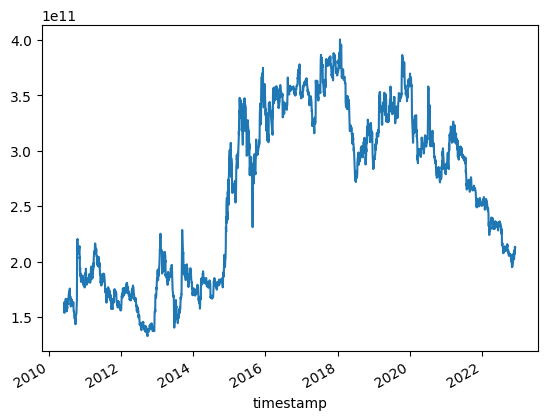

In [19]:
market_capital.plot()

In [36]:
market_capital.head()

timestamp
2022-12-02    2.122162e+11
2022-12-01    2.119227e+11
2022-11-30    2.119227e+11
2022-11-29    2.133903e+11
2022-11-28    2.075199e+11
Name: market_capital, dtype: float64

In [37]:
market_capital.index

DatetimeIndex(['2022-12-02', '2022-12-01', '2022-11-30', '2022-11-29',
               '2022-11-28', '2022-11-25', '2022-11-24', '2022-11-23',
               '2022-11-22', '2022-11-21',
               ...
               '2010-06-23', '2010-06-22', '2010-06-21', '2010-06-18',
               '2010-06-17', '2010-06-11', '2010-06-10', '2010-06-09',
               '2010-06-08', '2010-06-07'],
              dtype='datetime64[ns]', name='timestamp', length=3000, freq=None)

In [44]:
2.122162e+11 - 9.392696e+09
    

202823504000.0

In [49]:
t = market_capital.diff(-9)
t1 = market_capital.shift(-9)
t2 = t / t1

In [50]:
t2.head()

timestamp
2022-12-02    0.050872
2022-12-01    0.044863
2022-11-30    0.034384
2022-11-29    0.034139
2022-11-28    0.001416
Name: market_capital, dtype: float64

In [46]:
t.head(20)

timestamp
2022-12-02    1.027326e+10
2022-12-01    9.099174e+09
2022-11-30    7.044522e+09
2022-11-29    7.044522e+09
2022-11-28    2.935217e+08
2022-11-25    4.109304e+09
2022-11-24    2.641696e+09
2022-11-23    7.925087e+09
2022-11-22    6.751000e+09
2022-11-21    2.641696e+09
2022-11-18    2.935217e+09
2022-11-17    5.576913e+09
2022-11-16    1.086030e+10
2022-11-15    1.027326e+10
2022-11-14    8.512130e+09
2022-11-11    8.805652e+09
2022-11-10   -5.870435e+08
2022-11-09   -8.805652e+08
2022-11-08   -8.805652e+08
2022-11-07   -8.805652e+08
Name: market_capital, dtype: float64

In [35]:
2.122162e+11 - 2.019430e+11

10273200000.0

In [48]:
t1.head(20)


timestamp
2022-12-02    2.019430e+11
2022-12-01    2.028235e+11
2022-11-30    2.048782e+11
2022-11-29    2.063458e+11
2022-11-28    2.072263e+11
2022-11-25    2.063458e+11
2022-11-24    2.037041e+11
2022-11-23    1.990077e+11
2022-11-22    1.993013e+11
2022-11-21    1.993013e+11
2022-11-18    1.998883e+11
2022-11-17    1.993013e+11
2022-11-16    1.954855e+11
2022-11-15    1.969531e+11
2022-11-14    1.978337e+11
2022-11-11    1.948984e+11
2022-11-10    1.995948e+11
2022-11-09    2.001818e+11
2022-11-08    2.001818e+11
2022-11-07    2.007689e+11
Name: market_capital, dtype: float64

In [10]:
market_capital.head()

timestamp
2010-06-07    1.557620e+11
2010-06-08    1.536428e+11
2010-06-09    1.633558e+11
2010-06-10    1.572631e+11
2010-06-11    1.586406e+11
Name: market_capital, dtype: float64

<AxesSubplot: xlabel='timestamp'>

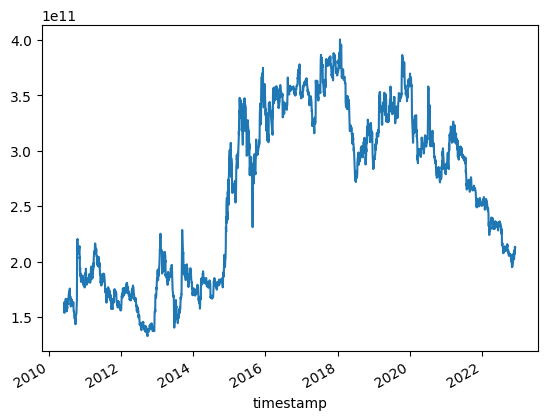

In [11]:
market_capital.plot()

<AxesSubplot: xlabel='timestamp'>

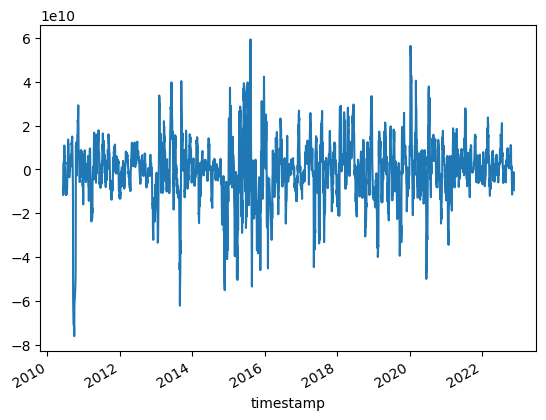

In [14]:
# calculate the change of market capital by 10 days
market_capital.diff(-10).plot()
